Importing libraries and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf

In [2]:
#List of images
images_list = os.listdir('dataset/flickr30k_images/flickr30k_images/')
print(len(images_list))

31783


In [3]:
image_size = (256, 256)
num_channels = 3

Visualizing sample

In [4]:
sample_size = 30
sample_images_list = images_list[:sample_size]

In [5]:
images = []
for img_name in sample_images_list:
    images.append(plt.imread('dataset/flickr30k_images/flickr30k_images/' + img_name))
    images.append(plt.imread('dataset/flickr30k_images/flickr30k_images/' + img_name))

In [6]:
images = np.array(images)

In [7]:
for i in range(images.shape[0]):
    images[i] = cv2.resize(images[i], image_size)
    images[i] = images[i].reshape(1, image_size[0], image_size[1], num_channels)

In [8]:
images = np.vstack(images[:])
print(images.shape) #shape is now (30, 256, 256, 3)

(60, 256, 256, 3)


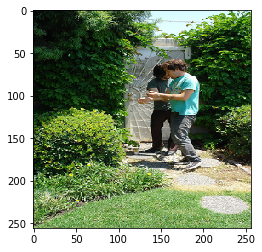

In [9]:
plt.imshow(images[0])
plt.show()

In [10]:
images_caption = pd.read_csv('dataset/flickr30k_images/results.csv', delimiter='|')

In [11]:
images_caption.columns = ['image_name', 'comment_number', 'comment']
images_caption.head()

,image_name,comment_number,comment
0,1000092795.jpg,0,Two young guys with shaggy hair look at their...
1,1000092795.jpg,1,"Two young , White males are outside near many..."
2,1000092795.jpg,2,Two men in green shirts are standing in a yard .
3,1000092795.jpg,3,A man in a blue shirt standing in a garden .
4,1000092795.jpg,4,Two friends enjoy time spent together .


In [12]:
def get_captions(images_list, images_caption):
    """
    images_list: list of image names
    images_captions: dataframe extracted from results.csv
    
    Returns: List of captions corresponding to images_list
    """
    captions_list = []
    
    for img_name in images_list:
        captions_list.append(images_caption[images_caption['image_name'] == img_name]['comment'].iat[0])
    
    return captions_list

In [13]:
captions = np.array(get_captions(sample_images_list, images_caption))
print("Total Captions :", len(captions))

Total Captions : 30
